### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot 
import seaborn as sns

from pprint import pprint
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap

### Import Classifier Modules and Functions from Scikit-Learn 

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

### Import Warning Filters

In [3]:
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Set the Seed Value 

In [4]:
from numpy.random import seed
seed(7)

### Load the dataset

In [5]:
raw_df = pd.read_csv("winequality-white.csv",  sep = ';')
raw_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Separate training data from validation data. Use the first 4000 rows as training dataset. Remove last 898 rows and set aside as validation dataset. Save to csv.

In [6]:
train_df = raw_df.iloc[:4000]
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8.0,0.37,0.31,4.7,0.038,3.0,127.0,0.99186,2.90,0.72,12.1,5
3996,6.7,0.28,0.34,8.9,0.048,32.0,111.0,0.99455,3.25,0.54,11.0,7
3997,6.0,0.26,0.29,3.1,0.041,37.0,144.0,0.98944,3.22,0.39,12.8,7
3998,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6


In [7]:
train_df.to_csv('train_dataset.csv', index = False)

In [8]:
validation_df = raw_df.iloc[4000:4899]
validation_df = validation_df.drop(columns=['quality'])
validation_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4000,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5
4001,6.4,0.25,0.57,1.0,0.062,21.0,122.0,0.99238,3.00,0.40,9.5
4002,6.1,0.25,0.48,15.8,0.052,25.0,94.0,0.99782,3.07,0.45,9.2
4003,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.99111,3.07,0.72,11.1
4004,6.5,0.38,0.26,5.2,0.042,33.0,112.0,0.99067,3.06,0.50,12.3
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [9]:
validation_df.to_csv('validation_dataset.csv', index = False)

### Import training dataset back to notebook.

In [10]:
training_df = pd.read_csv("train_dataset.csv")
training_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8.0,0.37,0.31,4.7,0.038,3.0,127.0,0.99186,2.90,0.72,12.1,5
3996,6.7,0.28,0.34,8.9,0.048,32.0,111.0,0.99455,3.25,0.54,11.0,7
3997,6.0,0.26,0.29,3.1,0.041,37.0,144.0,0.98944,3.22,0.39,12.8,7
3998,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6


In [11]:
training_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,6.957212,0.275817,0.341098,6.364063,0.045631,35.574000,140.488625,0.994188,3.191967,0.489237,10.461225,5.879750
std,0.844625,0.100184,0.122548,5.091631,0.021960,16.910471,43.264248,0.002993,0.152897,0.114696,1.215563,0.909943
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.210000,0.270000,1.700000,0.036000,24.000000,109.000000,0.991880,3.090000,0.410000,9.400000,5.000000
50%,6.900000,0.260000,0.320000,5.200000,0.043000,34.000000,137.000000,0.993900,3.180000,0.470000,10.300000,6.000000
75%,7.400000,0.320000,0.400000,9.800000,0.050000,46.000000,170.000000,0.996258,3.290000,0.550000,11.300000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.200000,9.000000


In [12]:
quality_score_df = training_df['quality'].value_counts().rename_axis('quality score').reset_index(name='counts')
quality_score_df

,quality score,counts
0,6,1717
1,5,1214
2,7,747
3,8,156
4,4,142
5,3,19
6,9,5


Text(0.5, 1.0, 'White Wine Quality Ratings')

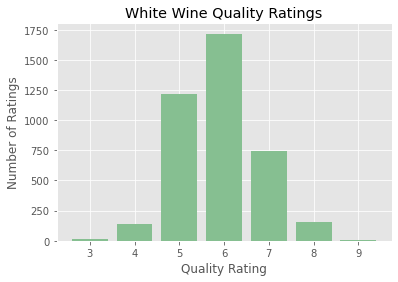

In [13]:
plt.style.use('ggplot')
plt.bar(quality_score_df['quality score'], quality_score_df['counts'], color='#86bf91')
plt.xlabel("Quality Rating")
plt.ylabel("Number of Ratings")
plt.title("White Wine Quality Ratings")

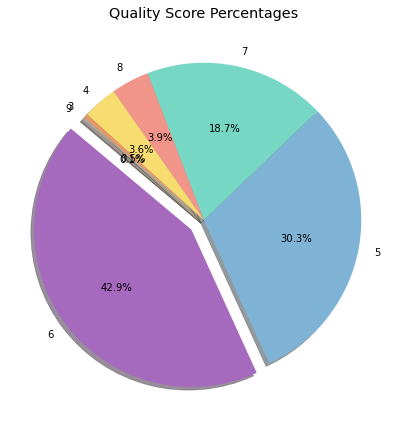

In [14]:
labels = quality_score_df['quality score'].to_list()
sizes = quality_score_df['counts'].to_list()
colors = ['#A569BD', '#7FB3D5', '#76D7C4', '#F1948A', '#F7DC6F', '#E59866', '#AAB7B8']
explode = (0.1, 0, 0, 0, 0, 0, 0)
fig, ax1 = plt.subplots(figsize = (12, 6)) 
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Quality Score Percentages")
plt.tight_layout()
plt.show()

In [15]:
#maybe we can say a rating >= 7 is considered a good wine?

### Data Preprocessing.

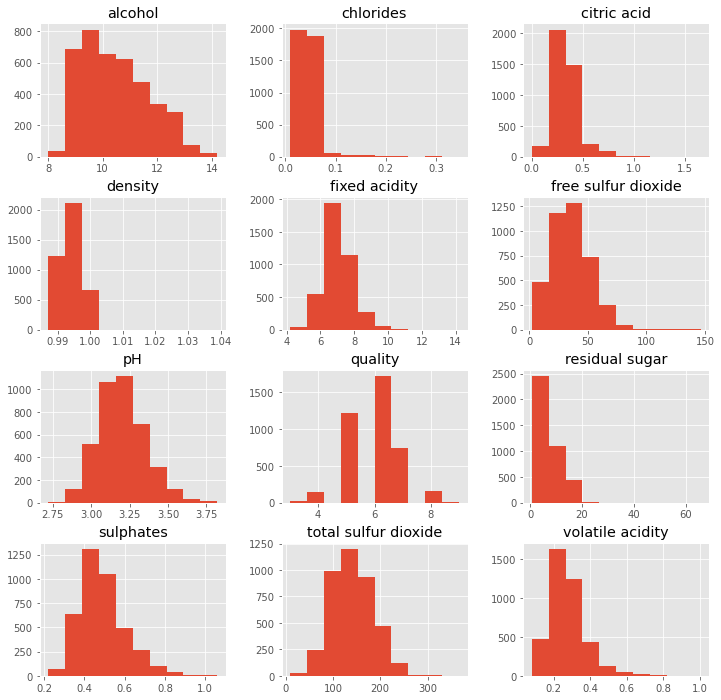

In [16]:
# Histogram distribution 

train_df.hist(bins=10,figsize=(12, 12))
plt.show()

In [74]:
X = training_df.drop("quality", axis=1)
y = training_df["quality"]
print(X.shape, y.shape)

(4000, 11) (4000,)


In [75]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=7, 
                                                    stratify=y)

In [76]:
# Standardize feature variables
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [78]:
# Machine Learning Model3 AdaBoost
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model3 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=1000, learning_rate=0.8)
model3 = model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.30      0.28      0.29        36
           5       0.67      0.59      0.63       303
           6       0.64      0.68      0.66       429
           7       0.50      0.55      0.53       187
           8       0.50      0.46      0.48        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1000
   macro avg       0.37      0.37      0.37      1000
weighted avg       0.60      0.60      0.60      1000



In [79]:
# Machine Learning Model4 Gradient Boost
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

model4 = GradientBoostingClassifier(random_state=7)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.33      0.11      0.17        36
           5       0.63      0.55      0.59       303
           6       0.56      0.71      0.63       429
           7       0.55      0.49      0.52       187
           8       0.45      0.13      0.20        39
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1000
   macro avg       0.36      0.28      0.30      1000
weighted avg       0.57      0.57      0.56      1000



In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model5 = XGBClassifier(n_estimators = 1000,
                       max_depth = 7,
                       subsample = 1,
                       colsample_bytree = 0.8,
                       gamma = 1)
model5 = model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.71      0.28      0.40        36
           5       0.73      0.67      0.70       303
           6       0.65      0.78      0.71       429
           7       0.67      0.60      0.63       187
           8       0.77      0.44      0.56        39
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1000
   macro avg       0.50      0.39      0.43      1000
weighted avg       0.68      0.68      0.67      1000



C:\Users\hongy\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



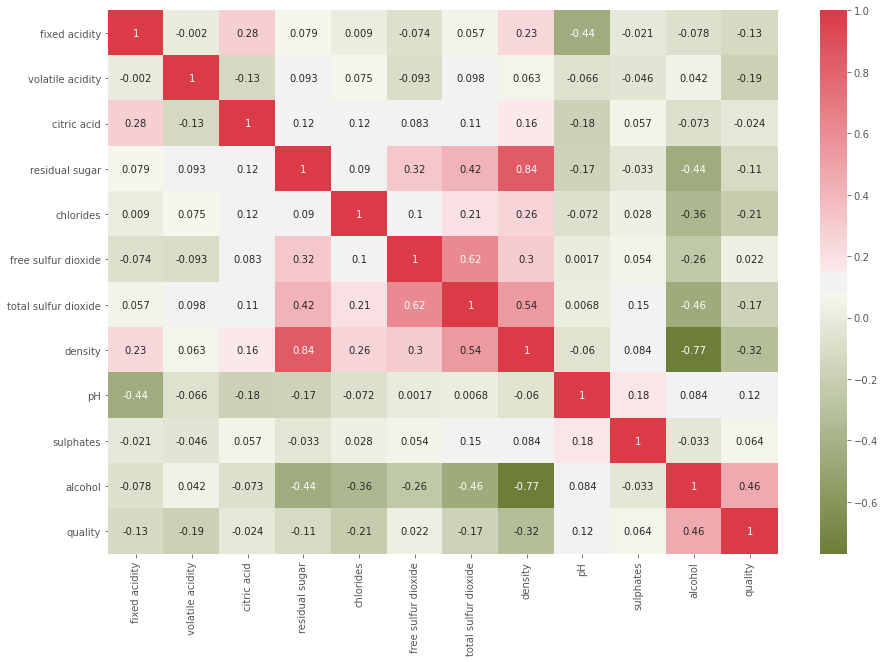

In [20]:
corr = train_df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, 
yticklabels=corr.columns, annot=True, 
cmap=sns.diverging_palette(100, 10, as_cmap=True))

In [21]:
corr_matrix = train_df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.455195
pH                      0.119212
sulphates               0.064412
free sulfur dioxide     0.022103
citric acid            -0.024067
residual sugar         -0.113200
fixed acidity          -0.125991
total sulfur dioxide   -0.170628
volatile acidity       -0.191416
chlorides              -0.209571
density                -0.324651
Name: quality, dtype: float64

In [22]:
# Convert the quality rating to a categorical level (below, average, above)
# 1,2,3,4 -> below
# 5,6,7 -> average
# 8,9 -> above

quality = train_df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("below")
    elif num > 7:
        category.append("above")
    else:
        category.append("average")

In [23]:
# See proportion of good vs bad wines
[(i, category.count(i)) for i in set(category)]

[('average', 3678), ('above', 161), ('below', 161)]